In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import math
import tensorflow as tf
import datetime

2025-05-03 12:39:07.837780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746275948.017774      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746275948.069474      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2025-05-03 12:39:18--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 142.250.107.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2025-05-03 12:39:18 (97.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [3]:
!wget https://raw.githubusercontent.com/azhermurad/Deep_Learning_with_TensorFlow/refs/heads/main/helper_functions.py

--2025-05-03 12:39:18--  https://raw.githubusercontent.com/azhermurad/Deep_Learning_with_TensorFlow/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2693 (2.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   2.63K  --.-KB/s    in 0s      

2025-05-03 12:39:18 (37.5 MB/s) - ‘helper_functions.py’ saved [2693/2693]



In [4]:
from helper_functions import unzip,create_tensorboard_callback

In [5]:
unzip("nlp_getting_started.zip")

In [6]:
train_data = pd.read_csv("train.csv")
test_data =pd.read_csv("test.csv")

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
train_data.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [9]:
test_data.head(3)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."


In [10]:
train_data["target"].count()

7613

In [11]:
train_data["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [12]:
# check for imbalance data 

<Axes: xlabel='target', ylabel='count'>

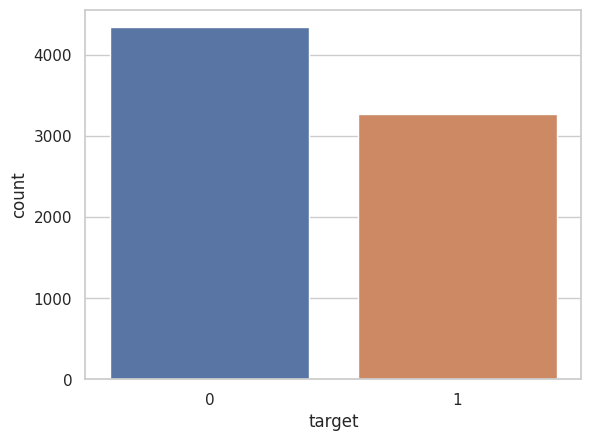

In [13]:
sns.set_theme(style="whitegrid")
sns.countplot(x="target",data=train_data)

In [14]:
len(train_data), len(test_data)

(7613, 3263)

In [15]:
# lets visualize some random example from the train data 
random_index = random.randint(0, len(train_data)-5)
for row in train_data[random_index: random_index + 5][["text","target"]].itertuples():
    _,text,target = row
    print(f"Target: {target}","Real diaster" if target >0 else "Not Diaster")
    print(text)
    print("____\n")

Target: 0 Not Diaster
San Antonio Stars head coach Dan Hughes was just carted to the locker room after one of his guards collided with... http://t.co/4dbhOnO3Rk
____

Target: 1 Real diaster
Bicycle-SUV accident in Mesick: Police say that the bicyclist entered onto West M-115 and collided with a boat... http://t.co/A9gtOPyZK8
____

Target: 0 Not Diaster
It's Even Worse Than It Looks: How the American Constitutional System Collided With the New PoliticÛ_ http://t.co/Gfa3SOw9zn
____

Target: 0 Not Diaster
OMG OMG OMG #JustinBieber and #HarryStyles have collided in a nuclear accident at #Cern ^oo^

#HarryBeCareful http://t.co/p4huQUNDQi
____

Target: 1 Real diaster
16 dead in Russia bus accident: At least 16 people were killed and 26 others injured when two buses collided i... http://t.co/ybyP68ieVn
____



In [16]:
# now we have to split the data into train and validation 
from sklearn.model_selection import train_test_split
X = train_data["text"]
y= train_data["target"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [17]:
print(f"train: {len(train_data)}")
print(f"X_train:  {len(X_train)}")
print(f"X_val:  {len(X_val)}")
print(f"10% of train data is {math.ceil(len(train_data)* 0.1)}")


train: 7613
X_train:  6851
X_val:  762
10% of train data is 762


## Convert text data into number 

In [18]:
list(zip(y_train[:3],X_train[:3]))

[(0,
  "'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j"),
 (1,
  'w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3'),
 (0,
  "When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol")]

In [19]:
text_into_number = tf.keras.layers.TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split="whitespace",
    output_mode='int',
    ngrams= None,
    output_sequence_length=None, # take the length of the 
)


I0000 00:00:1746275960.704993      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [20]:
text_into_number.adapt(X_train)

In [21]:
text_into_number(X_train[7]).numpy()


array([  32,   11,  255,    6,    2, 1834,    7,    8,   71,   97,    3,
         44,    4,    2, 6639])

In [22]:
# count vectorizer we have to create the vocabulary 

X_train[7]

"I'm on top of the hill and I can see a fire in the woods..."

In [23]:
text_into_number.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [24]:
text_into_number.vocabulary_size()

21089

In [25]:


text = []
for index in [3210, 55, 4768, 1338, 247, 1268,4,87]:
    text.append(text_into_number.get_vocabulary()[index])
" ".join(text)

'13000 people receive wildfires evacuation orders in california'

In [26]:
X_train[3]

'13,000 people receive #wildfires evacuation orders in California '

In [27]:
# average length of sentence of train dataset
round(sum([len(x.split(" ")) for x in X_train])/len([len(x.split(" ")) for x in X_train]))

15

In [28]:
max_features =10000
sequence_length = 15 # average length of the sentences of the train dataset

vectorizer_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)
vectorizer_layer.adapt(X_train)

In [29]:
vectorizer_layer(X_train[7]).numpy()

array([  32,   11,  255,    6,    2, 1834,    7,    8,   71,   97,    3,
         44,    4,    2, 6639])

In [30]:
vectorizer_layer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [31]:
X_train[7]

"I'm on top of the hill and I can see a fire in the woods..."

In [32]:
vectorizer_layer(X_train[3])

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([3210,   55, 4768, 1338,  247, 1268,    4,   87,    0,    0,    0,
          0,    0,    0,    0])>

In [33]:
vectorizer_layer(X_train)

<tf.Tensor: shape=(6851, 15), dtype=int64, numpy=
array([[   1, 2317,    5, ...,    0,    0,    0],
       [ 296, 2367, 2226, ...,    0,    0,    0],
       [  45,    8,   23, ..., 9495,  160,    0],
       ...,
       [   1,    1, 1904, ...,    1,    0,    0],
       [ 573,  140,    3, ...,    3,  481,  953],
       [   8, 1807,    5, ...,   89,   15,   40]])>

In [34]:
random_sentence = random.choice(X_train)
print(f"{random_sentence}")
print(f"{vectorizer_layer(random_sentence)}")

@SenSanders Gd ideas. I'm 77 wrked hard now have almost nothing fear lives with poor
Fran Reed 8437150124
[8643 5520 2435   32 6259 6597  772   49   24  668  545  197  357   14
  795]


In [35]:
len(vectorizer_layer.get_vocabulary())

10000

In [36]:
print(vectorizer_layer.get_vocabulary()[:5]) # most common words
print(vectorizer_layer.get_vocabulary()[-5:]) # least common words

['', '[UNK]', 'the', 'a', 'in']
['pakthey', 'pakistan\x89Ûªs', 'pakistans', 'pajamas', 'paints']


## Creating Embedding Using An Embedding Layer Of TensorFlow

In [37]:
# now we have to make the embedding for the words 
embedding_layer = tf.keras.layers.Embedding(
    input_dim = len(vectorizer_layer.get_vocabulary()),
    output_dim= 128,
    embeddings_initializer = "uniform"
)



In [38]:

random_sentence = random.choice(X_train)
print(f"{random_sentence}")
print(f"{vectorizer_layer(random_sentence)}")


@CortneyMo_ put this in Detroit niggas gone be acting out?? tryna fuck n drown mfs????????loose they buffs in the water?? https://t.co/OAQtjawGxg
[   1  458   19    4 3922  932 1195   22 4159   36 1946  361  798  439
    1]


In [39]:
embedding_layer(vectorizer_layer(random_sentence))

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[ 0.03484658,  0.02772177,  0.0232077 , ..., -0.0488111 ,
         0.00283156,  0.03049203],
       [-0.00345855,  0.00634862,  0.02820336, ..., -0.00807123,
        -0.02886215, -0.02965826],
       [-0.01837875, -0.02448509, -0.02094634, ..., -0.04043797,
        -0.03676796,  0.03214056],
       ...,
       [ 0.02888669,  0.00184293,  0.02767876, ..., -0.04787545,
         0.00885127, -0.01364448],
       [ 0.01200048,  0.03386761, -0.04943226, ..., -0.01684479,
         0.01768568,  0.02528298],
       [ 0.03484658,  0.02772177,  0.0232077 , ..., -0.0488111 ,
         0.00283156,  0.03049203]], dtype=float32)>

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  accuracy_score,precision_recall_fscore_support

In [41]:
model_0 = Pipeline([('tfidf', TfidfVectorizer()), ('MultinomialNB', MultinomialNB())])
model_0.fit(X_train,y_train)
ypred = model_0.predict(X_val)

In [42]:
model_0.score(X_val,y_val)

0.7782152230971129

In [43]:
def calculate_results(y_true, y_pred):
    """Calculate Model Accuracy, Precision, Recall  and F1-Score"""
    accuracy = accuracy_score(y_true, ypred)
    precision,recall,fscore,_ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    return {
        "accuracy": accuracy,
        "precison": precision,
        "recall":recall,
        "f1_score": fscore
    }
    

In [44]:
baseline_model_result = calculate_results(y_val, ypred)
baseline_model_result

{'accuracy': 0.7782152230971129,
 'precison': 0.792992256322435,
 'recall': 0.7782152230971129,
 'f1_score': 0.7703527809038113}

## Model 1: Feed Forward Neural Network


In [45]:
input_layer =   tf.keras.Input(shape=(1,),dtype=tf.string)
x= vectorizer_layer(input_layer)
x = embedding_layer(x)
# x =tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.GlobalAveragePooling1D()(x)
output_layer = tf.keras.layers.Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(input_layer, output_layer, name="model_1") 

In [46]:
model_1.summary()
# data_format='channels_last': 3D tensor with shape: (batch_size, steps, features)
# 

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=["accuracy"])

In [48]:
history_1 = model_1.fit(
    X_train, 
    y_train, 
    validation_data=(X_val,y_val),   
    epochs=5,
    callbacks=[create_tensorboard_callback("model_log","model_1")]
)

Saved tensorboard log files to model_log/model_1/20250503-123923
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6158 - loss: 0.6660 - val_accuracy: 0.6542 - val_loss: 0.6317
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6971 - loss: 0.5950 - val_accuracy: 0.6537 - val_loss: 0.6280
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7040 - loss: 0.5671 - val_accuracy: 0.6526 - val_loss: 0.6324
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6984 - loss: 0.5619 - val_accuracy: 0.6535 - val_loss: 0.6407
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6940 - loss: 0.5588 - val_accuracy: 0.6498 - val_loss: 0.6424


1. batch_size:
Number of samples processed together in one forward/backward pass.
For example, if you set batch_size = 32, the model will process 32 sequences at a time.

2. steps (or timesteps):
The number of time steps in each sequence.
In NLP, this might be the number of words or tokens in a sentence.

3. features:
The number of features per step.
In NLP, this could be the embedding dimension.


In [49]:
model_1.evaluate(X_val,y_val)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6495 - loss: 0.6475 


[0.642367959022522, 0.6497812867164612]

In [50]:
model_1_pred =np.round(np.mean(tf.squeeze(model_1.predict(X_val)),axis=1))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [51]:
model_1_result = calculate_results(y_val,model_1_pred)
model_1_result

{'accuracy': 0.7782152230971129,
 'precison': 0.7912362028110068,
 'recall': 0.7388451443569554,
 'f1_score': 0.7156137356333562}

In [52]:
baseline_model_result

{'accuracy': 0.7782152230971129,
 'precison': 0.792992256322435,
 'recall': 0.7782152230971129,
 'f1_score': 0.7703527809038113}

## Model_2 with GlobalAveragePooling Layer

In [53]:
input_layer =   tf.keras.Input(shape=(1,),dtype=tf.string)
x= vectorizer_layer(input_layer)
x = embedding_layer(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
output_layer = tf.keras.layers.Dense(1,activation="sigmoid")(x)
model_2 = tf.keras.Model(input_layer, output_layer, name="model_2") 

In [54]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=["accuracy"])
history_2 = model_2.fit(
    X_train, 
    y_train, 
    validation_data=(X_val,y_val),   
    epochs=5,
    callbacks=[create_tensorboard_callback("model_log","model_2")]
)

Saved tensorboard log files to model_log/model_2/20250503-123934
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7240 - loss: 0.6132 - val_accuracy: 0.7743 - val_loss: 0.5231
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8569 - loss: 0.4117 - val_accuracy: 0.7940 - val_loss: 0.4800
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8803 - loss: 0.3234 - val_accuracy: 0.7822 - val_loss: 0.4740
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9056 - loss: 0.2630 - val_accuracy: 0.7808 - val_loss: 0.4829
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9244 - loss: 0.2188 - val_accuracy: 0.7703 - val_loss: 0.5014


In [56]:
model_2_pred = model_2.predict(X_val)
model_2_pred = tf.round(tf.squeeze(model_2_pred))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [57]:
model_2_result = calculate_results(y_val,model_2_pred)
model_2_result

{'accuracy': 0.7782152230971129,
 'precison': 0.7697038036007899,
 'recall': 0.7703412073490814,
 'f1_score': 0.7691775716074664}

## Visualize The Embeddings 

In [61]:
weights = model.get_layer('embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

10000

In [62]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [69]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

[<KerasVariable shape=(10000, 128), dtype=float32, path=embedding/embeddings>]

In [78]:
import zipfile

with zipfile.ZipFile('/kaggle/working/embeddings.zip', 'w') as zipf:
    zipf.write('vectors.tsv')
    zipf.write('metadata.tsv')


(10000, 128)